# Confusion matrices and metrics

To assess the ability of the algorithm of producing the correct output is necessary to evaluate a performance measure (P), which is a quantitative measure specific to the task. Ideally, the Machine Learning algorithm should be deployed in the real world, consequently we want to evaluate how well it performs on unseen data. Thus the performance measures will be calculated using a test set of data, separated from the data used for training. 
After testing the network with the script "prediction.py", we have to define the performance measure to evaluate the results.
For the deep CNN ResNet classifier we chose three different performance measures: *accuracy, recall and precision*. All of them are calculated onwards a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix):

 - **Accuracy**: the ratio of correctly predicted observations to the total observations.
 <table><tr>
 <td> <img src=Schermata%20del%202021-05-17%2010-35-59.png alt="Drawing" style="width:590px;height:90px"/> </td>
 <td> <img src=Schermata%20del%202021-05-17%2012-27-37.png alt="Drawing" style="width:280px;height:330px"/> </td>
 </tr></table>

 - **Recall**: the ratio of correctly predicted positive observations to the all observations in actual class. Because our network is a multiclass classifier, this metrics is calculated for each label and the final result is the mean over the 4 labels.
 
 <table><tr>
<td> <img src=Schermata%20del%202021-05-17%2010-37-11.png alt="Drawing" style="width:320px;height:60px"/> </td>
<td> <img src=Schermata%20del%202021-05-17%2012-39-14.png alt="Drawing" style="width:190px;height:190px"/> </td>
 </tr></table>
 
 
 - **Precision**: the ratio of correctly predicted positive observations to the total predicted positive observations. Even in this case the metrics is calculated for each label and the final result is the mean over the 4 labels.
 
 <table><tr>
 <td> <img src=Schermata%20del%202021-05-17%2010-37-52.png style="width:320px;height:60px"/> </td>
 <td> <img src=Schermata%20del%202021-05-17%2012-49-53.png style="width:190px;height:190px"/> </td>
 </tr></table>

This script can be used to obtain the confusion matrix and metrics (accuracy, recall and precision) on each tested CNN trained on a single projection (Cranio-Caudal Right [CC_R], Cranio-Caudal Left [CC_L], Medio-Lateral-Oblique Right [MLO_R] and Medio-Lateral-Oblique Left [MLO_L]). It also computes the confusion matrix and metrics on each side (Right and Left) and the total confusion  matrix and the total metrics calculated over all four projections. 
This is the final result used as performance measure to evaluate the deep neural network.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import recall_score, accuracy_score, precision_score, classification_report

## How to build the confusion matrix

This function prints and plots the confusion matrix. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

Normalization can be applied by setting `normalize=True`to obtain the confusion matrix with normalization by class support size (number of elements in each class). This kind of normalization can be interesting in case of class imbalance to have a more visual interpretation of which class is being misclassified.


In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #if not title:
    #    if normalize:
    #        title = 'Normalized confusion matrix'
    #    else:
    #        title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

## Import testing results and define labels

In [3]:
df_MLOR = pd.read_csv('predictions_mlor.txt', sep=" ", header=None)   #Read a comma-separated values (csv) file into DataFrame.
df_CCR = pd.read_csv('predictions_ccr.txt', sep=" ", header=None)
df_MLOR.columns = ["a", "b", "c", "d"]
df_CCR.columns = ["a", "b", "c", "d"]

In [4]:
label = 14*[0] + 51*[1] + 50*[2] + 13*[3]

In [5]:
df_MLOR['label'] = label
df_CCR['label'] = label

In [6]:
df_CCR.head()

,a,b,c,d,label
0,0.383799,0.603904,0.012240,0.000056,0
1,0.757996,0.240576,0.001372,0.000056,0
2,0.725141,0.267239,0.006903,0.000718,0
3,0.935155,0.064467,0.000370,0.000009,0
4,0.031426,0.940031,0.028493,0.000051,0


In [7]:
df_MLOR.head()

,a,b,c,d,label
0,0.318187,0.674340,0.007449,0.000024,0
1,0.673485,0.312149,0.012549,0.001817,0
2,0.951315,0.047724,0.000752,0.000208,0
3,0.777162,0.221808,0.001025,0.000004,0
4,0.034505,0.808531,0.139677,0.017288,0


In [8]:
prediction_MLOR = np.argmax((df_MLOR.iloc[:,0:4]).to_numpy(), axis=1)
prediction_CCR = np.argmax((df_CCR.iloc[:,0:4]).to_numpy(), axis=1)

In [9]:
df_MLOR['predict'] = prediction_MLOR
df_CCR['predict'] = prediction_CCR

In [10]:
df_CCR.head()

,a,b,c,d,label,predict
0,0.383799,0.603904,0.012240,0.000056,0,1
1,0.757996,0.240576,0.001372,0.000056,0,0
2,0.725141,0.267239,0.006903,0.000718,0,0
3,0.935155,0.064467,0.000370,0.000009,0,0
4,0.031426,0.940031,0.028493,0.000051,0,1


In [11]:
df_MLOR.head()

,a,b,c,d,label,predict
0,0.318187,0.674340,0.007449,0.000024,0,1
1,0.673485,0.312149,0.012549,0.001817,0,0
2,0.951315,0.047724,0.000752,0.000208,0,0
3,0.777162,0.221808,0.001025,0.000004,0,0
4,0.034505,0.808531,0.139677,0.017288,0,1


In [12]:
class_names = np.array(['A','B','C','D'], dtype='<U10')

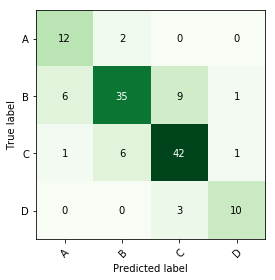

In [13]:
plot_confusion_matrix(df_CCR['label'], df_CCR['predict'], classes=class_names)
plt.savefig('provaconfusion_CCR.png', dpi=300)

In [14]:
metrics_CCR = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(df_CCR['label'], df_CCR['predict'])],
    'recall':[recall_score(df_CCR['label'], df_CCR['predict'], average='macro')],
    'precision':[precision_score(df_CCR['label'], df_CCR['predict'], average='macro')]
    },
orient = 'index')

In [15]:
metrics_CCR

,0
accuracy,0.773438
recall,0.788162
precision,0.764161


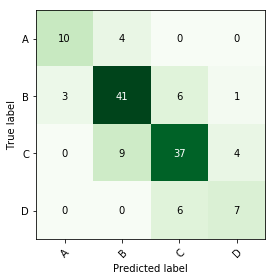

In [16]:
plot_confusion_matrix(df_MLOR['label'], df_MLOR['predict'], classes=class_names)
plt.savefig('provaconfusion_MLOR.png', dpi=300)

In [17]:
metrics_MLOR = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(df_MLOR['label'], df_MLOR['predict'])],
    'recall':[recall_score(df_MLOR['label'], df_MLOR['predict'], average='macro')],
    'precision':[precision_score(df_MLOR['label'], df_MLOR['predict'], average='macro')]
    },
orient = 'index')

In [18]:
metrics_MLOR

,0
accuracy,0.742188
recall,0.699167
precision,0.716731


In [19]:
pred_right = (df_MLOR.iloc[:,0:4] + df_CCR.iloc[:,0:4])/2

In [20]:
pred_right

,a,b,c,d
0,0.350993,0.639122,0.009845,0.000040
1,0.715741,0.276363,0.006960,0.000936
2,0.838228,0.157481,0.003828,0.000463
3,0.856159,0.143137,0.000698,0.000007
4,0.032965,0.874281,0.084085,0.008669
5,0.546735,0.444429,0.008726,0.000110
6,0.600579,0.379326,0.014020,0.006075
7,0.808139,0.176785,0.011132,0.003944
8,0.929201,0.068083,0.001325,0.001391
9,0.843622,0.155188,0.001084,0.000106


In [21]:
pred_right['label'] = label

In [22]:
prediction_R = np.argmax((pred_right.iloc[:,0:4]).to_numpy(), axis=1)

In [23]:
pred_right['predict'] = prediction_R
pred_right.head(n=21)

,a,b,c,d,label,predict
0,0.350993,0.639122,0.009845,0.000040,0,1
1,0.715741,0.276363,0.006960,0.000936,0,0
2,0.838228,0.157481,0.003828,0.000463,0,0
3,0.856159,0.143137,0.000698,0.000007,0,0
4,0.032965,0.874281,0.084085,0.008669,0,1
5,0.546735,0.444429,0.008726,0.000110,0,0
6,0.600579,0.379326,0.014020,0.006075,0,0
7,0.808139,0.176785,0.011132,0.003944,0,0
8,0.929201,0.068083,0.001325,0.001391,0,0
9,0.843622,0.155188,0.001084,0.000106,0,0


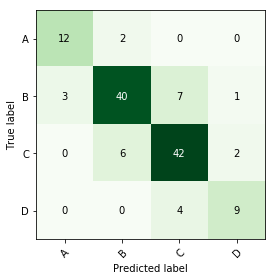

In [24]:
plot_confusion_matrix(pred_right['label'], pred_right['predict'], classes=class_names)
plt.savefig('provaconfusion_right.png', dpi=300)

In [25]:
metrics_right = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(pred_right['label'], pred_right['predict'])],
    'recall':[recall_score(pred_right['label'], pred_right['predict'], average='macro')],
    'precision':[precision_score(pred_right['label'], pred_right['predict'], average='macro')]
    },
orient = 'index')

In [26]:
metrics_right

,0
accuracy,0.804688
recall,0.793441
precision,0.793947


In [36]:
df_MLOL = pd.read_csv('predictions_mlol.txt', sep=" ", header=None)   #Read a comma-separated values (csv) file into DataFrame.
df_CCL = pd.read_csv('predictions_ccl.txt', sep=" ", header=None)
df_MLOL.columns = ["a", "b", "c", "d"]
df_CCL.columns = ["a", "b", "c", "d"]

In [37]:
df_MLOL['label'] = label
df_CCL['label'] = label

In [38]:
df_MLOL.head()

,a,b,c,d,label
0,0.626203,0.356720,0.016132,0.000945,0
1,0.727158,0.228435,0.027569,0.016838,0
2,0.171668,0.801795,0.025417,0.001120,0
3,0.857950,0.137106,0.004309,0.000635,0
4,0.724302,0.265760,0.007596,0.002342,0


In [39]:
df_CCL.head()

,a,b,c,d,label
0,0.003451,0.927167,0.068421,0.000961,0
1,0.924864,0.074537,0.000573,0.000026,0
2,0.135553,0.779707,0.079313,0.005427,0
3,0.453190,0.524540,0.020415,0.001855,0
4,0.013868,0.915760,0.070050,0.000323,0


In [40]:
prediction_MLOL = np.argmax((df_MLOL.iloc[:,0:4]).to_numpy(), axis=1)
prediction_CCL = np.argmax((df_CCL.iloc[:,0:4]).to_numpy(), axis=1)

In [41]:
df_MLOL['predict'] = prediction_MLOL
df_CCL['predict'] = prediction_CCL

In [42]:
df_MLOL.head()

,a,b,c,d,label,predict
0,0.626203,0.356720,0.016132,0.000945,0,0
1,0.727158,0.228435,0.027569,0.016838,0,0
2,0.171668,0.801795,0.025417,0.001120,0,1
3,0.857950,0.137106,0.004309,0.000635,0,0
4,0.724302,0.265760,0.007596,0.002342,0,0


In [43]:
df_CCL.head()

,a,b,c,d,label,predict
0,0.003451,0.927167,0.068421,0.000961,0,1
1,0.924864,0.074537,0.000573,0.000026,0,0
2,0.135553,0.779707,0.079313,0.005427,0,1
3,0.453190,0.524540,0.020415,0.001855,0,1
4,0.013868,0.915760,0.070050,0.000323,0,1


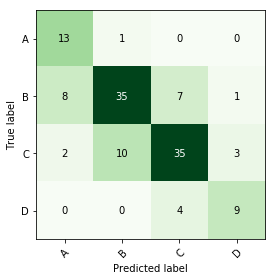

In [44]:
plot_confusion_matrix(df_MLOL['label'], df_MLOL['predict'], classes=class_names)
plt.savefig('provaconfusion_MLOL.png', dpi=300)

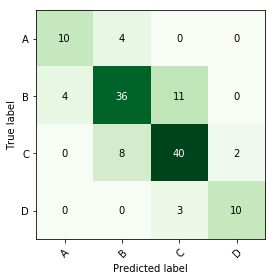

In [45]:
plot_confusion_matrix(df_CCL['label'], df_CCL['predict'], classes=class_names)
plt.savefig('provaconfusion_CCL.png', dpi=300)

In [46]:
metrics_MLOL = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(df_MLOL['label'], df_MLOL['predict'])],
    'recall':[recall_score(df_MLOL['label'], df_MLOL['predict'], average='macro')],
    'precision':[precision_score(df_MLOL['label'], df_MLOL['predict'], average='macro')]
    },
orient = 'index')

In [47]:
metrics_MLOL

,0
accuracy,0.718750
recall,0.751788
precision,0.694816


In [48]:
metrics_CCL = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(df_CCL['label'], df_CCL['predict'])],
    'recall':[recall_score(df_CCL['label'], df_CCL['predict'], average='macro')],
    'precision':[precision_score(df_CCL['label'], df_CCL['predict'], average='macro')]
    },
orient = 'index')

In [49]:
metrics_CCL

,0
accuracy,0.75000
recall,0.74735
precision,0.75959


In [50]:
pred_left = (df_MLOL.iloc[:,0:4] + df_CCL.iloc[:,0:4])/2

In [51]:
pred_left

,a,b,c,d
0,0.314827,0.641944,0.042276,0.000953
1,0.826011,0.151486,0.014071,0.008432
2,0.153611,0.790751,0.052365,0.003273
3,0.655570,0.330823,0.012362,0.001245
4,0.369085,0.590760,0.038823,0.001332
5,0.866548,0.128585,0.004637,0.000229
6,0.726554,0.182784,0.040640,0.050023
7,0.892695,0.096764,0.005074,0.005467
8,0.945516,0.050268,0.001349,0.002866
9,0.860387,0.136354,0.002954,0.000305


In [52]:
pred_left['label'] = label

In [53]:
prediction_L = np.argmax((pred_left.iloc[:,0:4]).to_numpy(), axis=1)

In [54]:
pred_left['predict'] = prediction_L
pred_left.head()

,a,b,c,d,label,predict
0,0.314827,0.641944,0.042276,0.000953,0,1
1,0.826011,0.151486,0.014071,0.008432,0,0
2,0.153611,0.790751,0.052365,0.003273,0,1
3,0.655570,0.330823,0.012362,0.001245,0,0
4,0.369085,0.590760,0.038823,0.001332,0,1


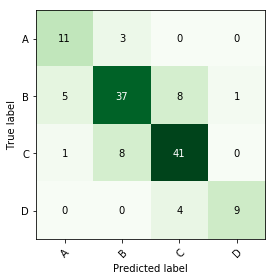

In [55]:
plot_confusion_matrix(pred_left['label'], pred_left['predict'], classes=class_names)
plt.savefig('provaconfusion_left.png', dpi=300)

In [56]:
metrics_left = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(pred_left['label'], pred_left['predict'])],
    'recall':[recall_score(pred_left['label'], pred_left['predict'], average='macro')],
    'precision':[precision_score(pred_left['label'], pred_left['predict'], average='macro')]
    },
orient = 'index')

In [60]:
metrics_left

,0
accuracy,0.765625
recall,0.755878
precision,0.772869


In [61]:
pred_total = (df_MLOL.iloc[:,0:4] + df_CCL.iloc[:,0:4] + df_MLOR.iloc[:,0:4] + df_CCR.iloc[:,0:4])/4

In [62]:
pred_total

,a,b,c,d
0,0.332910,0.640533,0.026060,0.000496
1,0.770876,0.213924,0.010516,0.004684
2,0.495919,0.474116,0.028096,0.001868
3,0.755864,0.236980,0.006530,0.000626
4,0.201025,0.732520,0.061454,0.005001
5,0.706642,0.286507,0.006681,0.000170
6,0.663566,0.281055,0.027330,0.028049
7,0.850417,0.136774,0.008103,0.004706
8,0.937359,0.059175,0.001337,0.002129
9,0.852004,0.145771,0.002019,0.000205


In [63]:
pred_total['label'] = label

In [64]:
prediction_TOT = np.argmax((pred_total.iloc[:,0:4]).to_numpy(), axis=1)

In [65]:
pred_total['predict'] = prediction_TOT
pred_total.head()

,a,b,c,d,label,predict
0,0.332910,0.640533,0.026060,0.000496,0,1
1,0.770876,0.213924,0.010516,0.004684,0,0
2,0.495919,0.474116,0.028096,0.001868,0,0
3,0.755864,0.236980,0.006530,0.000626,0,0
4,0.201025,0.732520,0.061454,0.005001,0,1


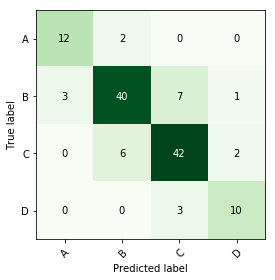

In [66]:
plot_confusion_matrix(pred_total['label'], pred_total['predict'], classes=class_names)
plt.savefig('provaconfusion_total.png', dpi=300)

In [67]:
metrics_total = pd.DataFrame.from_dict(
    {
    'accuracy':[accuracy_score(pred_total['label'], pred_total['predict'])],
    'recall':[recall_score(pred_total['label'], pred_total['predict'], average='macro')],
    'precision':[precision_score(pred_total['label'], pred_total['predict'], average='macro')]
    },
orient = 'index')

In [68]:
metrics_total

,0
accuracy,0.812500
recall,0.812672
precision,0.802564
